In [107]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pathlib
import json
import torch
from PIL import Image

In [7]:
data_dir = pathlib.Path('../data/Cityscapes/gtFine/train/')

In [30]:
city_name = 'aachen'
city_path = data_dir / city_name
suffix = ['color.png', 'instanceIds.png', 'labelIds.png']

In [17]:
data_name = 'aachen_000000_000019_gtFine_'

[PosixPath('../data/Cityscapes/gtFine/train/aachen/aachen_000000_000019_gtFine_color.png')]

In [21]:
path = city_path / (data_name + suffix[0])
label_map = cv2.imread(str(path))

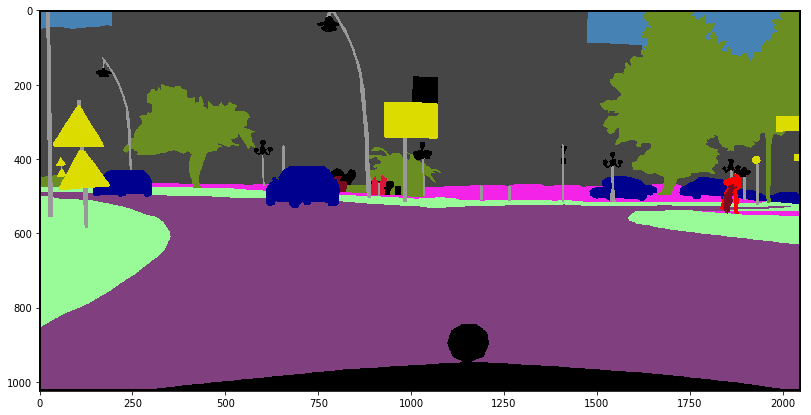

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.imshow(cv2.cvtColor(label_map, cv2.COLOR_BGR2RGB))

In [31]:
path = city_path / (data_name + suffix[2])
label_map = cv2.imread(str(path))

In [32]:
label_map.shape

(1024, 2048, 3)

In [33]:
np.unique(label_map)

array([ 0,  1,  3,  4,  7,  8, 11, 17, 20, 21, 22, 23, 24, 25, 26, 33],
      dtype=uint8)

In [35]:
path = city_path / (data_name + suffix[1])
inst_map = cv2.imread(str(path))
inst_map.shape

(1024, 2048, 3)

In [36]:
np.unique(inst_map)

array([  0,  93,  97, 101, 128], dtype=uint8)

In [41]:
np.unique(inst_map[:,:,0])

array([  0,  93,  97, 101, 128], dtype=uint8)

In [42]:
np.unique(inst_map[:,:,1])

array([  0,  93,  97, 101, 128], dtype=uint8)

In [43]:
np.unique(inst_map[:,:,2])

array([  0,  93,  97, 101, 128], dtype=uint8)

In [57]:
hoge = inst_map[:,:,0]

In [58]:
hoge = np.expand_dims(hoge, axis=2)

In [59]:
from copy import deepcopy
fuga = np.concatenate((hoge, deepcopy(hoge), deepcopy(hoge)), axis=2) 

In [60]:
np.array_equal(fuga, inst_map)

True

In [61]:
hoge = inst_map[:,:,0]
for i in range(hoge.shape[0]):
    for j in range(hoge.shape[1]):
        

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [63]:
heba = np.arange(9).reshape(3, 3)
heba[:, :-1]

array([[0, 1],
       [3, 4],
       [6, 7]])

In [65]:
heba[:, 1:]

array([[1, 2],
       [4, 5],
       [7, 8]])

In [66]:
heba

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [69]:
edge = np.zeros_like(heba)

In [70]:
edge[:, 1:]

array([[0, 0],
       [0, 0],
       [0, 0]])

In [73]:
(hoge[:,1:] != hoge[:, :-1])

1715

In [77]:
hoge = inst_map[:,:,0]
edge = np.zeros_like(hoge)
edge[:,1:] = np.logical_or(edge[:, 1:] , (hoge[:,1:] != hoge[:, :-1]))
edge[:,:-1] = np.logical_or(edge[:, :-1] , (hoge[:,1:] != hoge[:, :-1]))
edge[1:,:] = np.logical_or(edge[1:, :] , (hoge[1:,:] != hoge[:-1, :]))
edge[:-1,:] = np.logical_or(edge[:-1, :] , (hoge[1:,:] != hoge[:-1, :]))

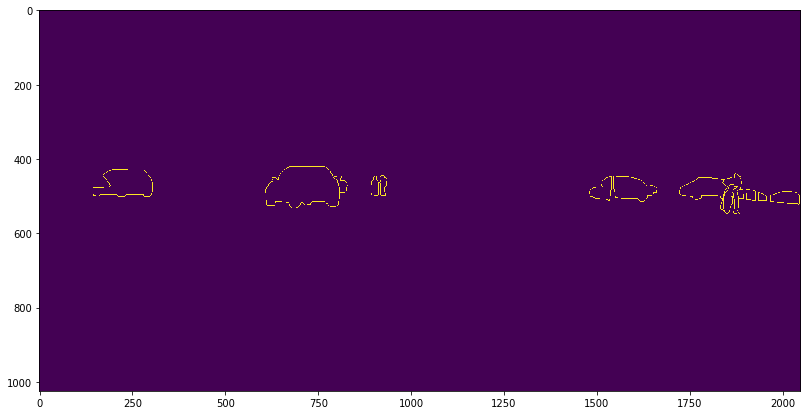

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.imshow(edge)

In [100]:
def get_edges(t):
    edge = torch.ByteTensor(t.size()).zero_()
    edge[:, :, :, 1:] = edge[:, :, :, 1:] | (t[:, :, :, 1:] != t[:, :, :, :-1])
    edge[:, :, :, :-1] = edge[:, :, :, :-1] | (t[:, :, :, 1:] !=
                                               t[:, :, :, :-1])
    edge[:, :, 1:, :] = edge[:, :, 1:, :] | (t[:, :, 1:, :] != t[:, :, :-1, :])
    edge[:, :, :-1, :] = edge[:, :, :-1, :] | (t[:, :, 1:, :] !=
                                               t[:, :, :-1, :])
    return edge.float()

In [85]:
hoge.shape

(1024, 2048)

In [87]:
t = torch.tensor(hoge)

In [88]:
t.shape

torch.Size([1024, 2048])

In [92]:
t = t.expand(1, 1, 1024, 2048)

In [101]:
edge = get_edges(t)

In [103]:
edge.size()

torch.Size([1, 1, 1024, 2048])

In [105]:
a = edge.squeeze().numpy()

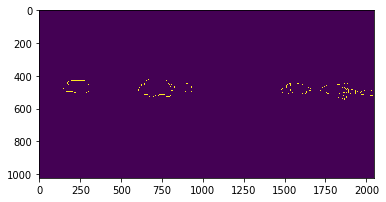

In [106]:
plt.imshow(a)

In [112]:
path = city_path / (data_name + suffix[1])
path

PosixPath('../data/Cityscapes/gtFine/train/aachen/aachen_000000_000019_gtFine_instanceIds.png')

In [115]:
x = np.array(Image.open(str(path)))
np.unique(x)

array([    0,     1,     3,     4,     7,     8,    11,    17,    20,
          21,    22,    23, 24000, 24001, 25000, 26003, 26004, 26005,
       26006, 26007, 26008, 26009, 26010, 33000, 33001], dtype=int32)

In [116]:
y = cv2.imread(str(path))
np.unique(y)

array([  0,  93,  97, 101, 128], dtype=uint8)

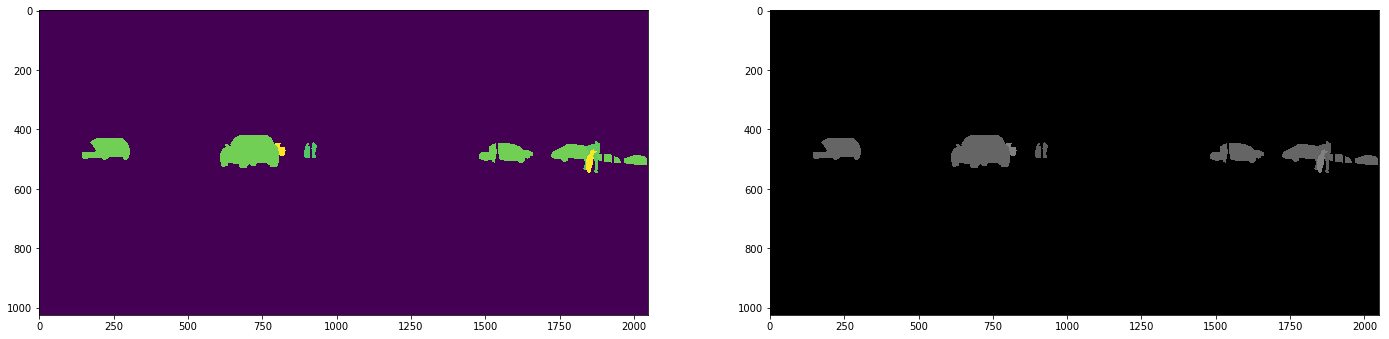

In [117]:
fig, ax = plt.subplots(1, 2, figsize=(24, 12))
ax[0].imshow(x)
ax[1].imshow(y)

In [129]:
x.shape

(1024, 2048)

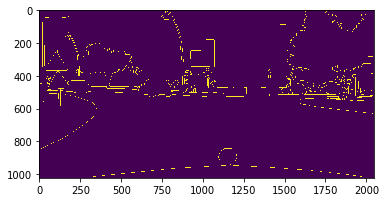

In [130]:
t = torch.tensor(x).expand(1,1,1024,2048)
edge_map = get_edges(t)
plt.imshow(edge_map.squeeze().numpy())

In [123]:
np.unique(t.numpy())

array([  0,  93,  97, 101, 128], dtype=uint8)

In [124]:
np.unique(y[:,:,0])

array([  0,  93,  97, 101, 128], dtype=uint8)

In [125]:
np.unique(y[:,:,1])

array([  0,  93,  97, 101, 128], dtype=uint8)

In [126]:
np.unique(y[:,:,2])

array([  0,  93,  97, 101, 128], dtype=uint8)

In [127]:
np.unique(y[:,:,:])

array([  0,  93,  97, 101, 128], dtype=uint8)